<a href="https://colab.research.google.com/github/helmypram/Data-Analysis-Gaming-Industry-Insights/blob/main/gamingsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace( '/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

#df (data frame)
df = pd.read_csv(sheet_url_trf)
# display the DataFrame
print(df)

https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/export?format=csv&gid=1485085913
                                     Name  Sales          Series    Release  \
0           PlayerUnknown's Battlegrounds   42.0             NaN  12/1/2017   
1                               Minecraft   33.0       Minecraft  11/1/2011   
2                              Diablo III   20.0          Diablo   5/1/2012   
3                             Garry's Mod   20.0             NaN  11/1/2006   
4                                Terraria   17.2             NaN   5/1/2011   
..                                    ...    ...             ...        ...   
172        Who Wants to Be a Millionaire?    1.0             NaN  11/1/1999   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander  12/1/1994   
174                            Zoo Tycoon    1.0      Zoo Tycoon  10/1/2001   
175      StarCraft II: Heart of the Swarm    1.0       StarCraft   3/1/2013   
176      StarC

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

# 1. Which game is the oldest and the newest games in that dataset?


In [ ]:
# Convert 'Release' column to datetime type
df['Release'] = pd.to_datetime(df['Release'])

# Find oldest and newest game
oldest_game = df.loc[df['Release'].idxmin()]['Name']
newest_game = df.loc[df['Release'].idxmax()]['Name']

print("The oldest game:", oldest_game)
print("The newest game:", newest_game)

The oldest game: Hydlide
The newest game: Valheim


Visualisasi pertama menggunakan diagram batang horizontal untuk membandingkan tanggal rilis dari dua game yang diamati: game paling tua dan game paling baru. Diagram ini memberikan gambaran langsung tentang perbedaan tanggal rilis antara kedua game tersebut.

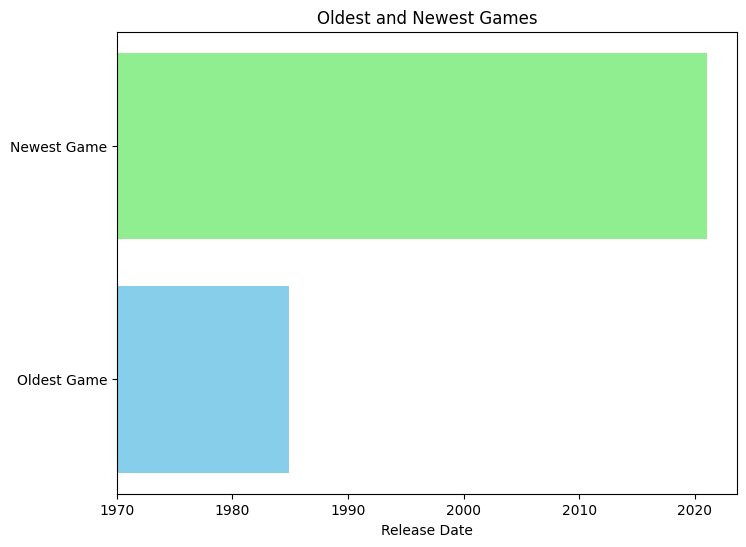

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar plot
ax.barh(['Oldest Game', 'Newest Game'], [df['Release'].min(), df['Release'].max()], color=['skyblue', 'lightgreen'])

# Add labels and title
ax.set_xlabel('Release Date')
ax.set_title('Oldest and Newest Games')

# Show plot
plt.show()

Visualisasi kedua menggunakan diagram titik untuk menampilkan tanggal rilis dari setiap game dalam DataFrame. Setiap titik dalam diagram ini mewakili tanggal rilis dari satu game, dengan sumbu x menunjukkan tanggal rilis dan sumbu y menunjukkan indeks baris game dalam DataFrame. Visualisasi ini memberikan gambaran yang lebih rinci tentang distribusi tanggal rilis dari semua game dalam dataset.

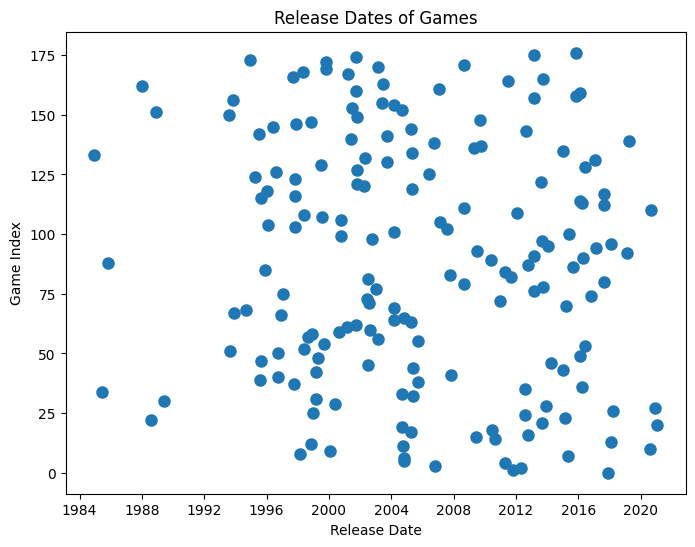

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the release dates
ax.plot(df['Release'], df.index, 'o', markersize=8)

# Add labels and title
ax.set_xlabel('Release Date')
ax.set_ylabel('Game Index')
ax.set_title('Release Dates of Games')

# Show plot
plt.show()

#2. Which publisher published most of the games ?


In [ ]:
most_published = df['Publisher'].mode()[0]

print("Publisher that published most of the games:", most_published)


Publisher that published most of the games: Electronic Arts


Publisher that published most of the games: Electronic Arts
Number of games published by the most published publisher: 19


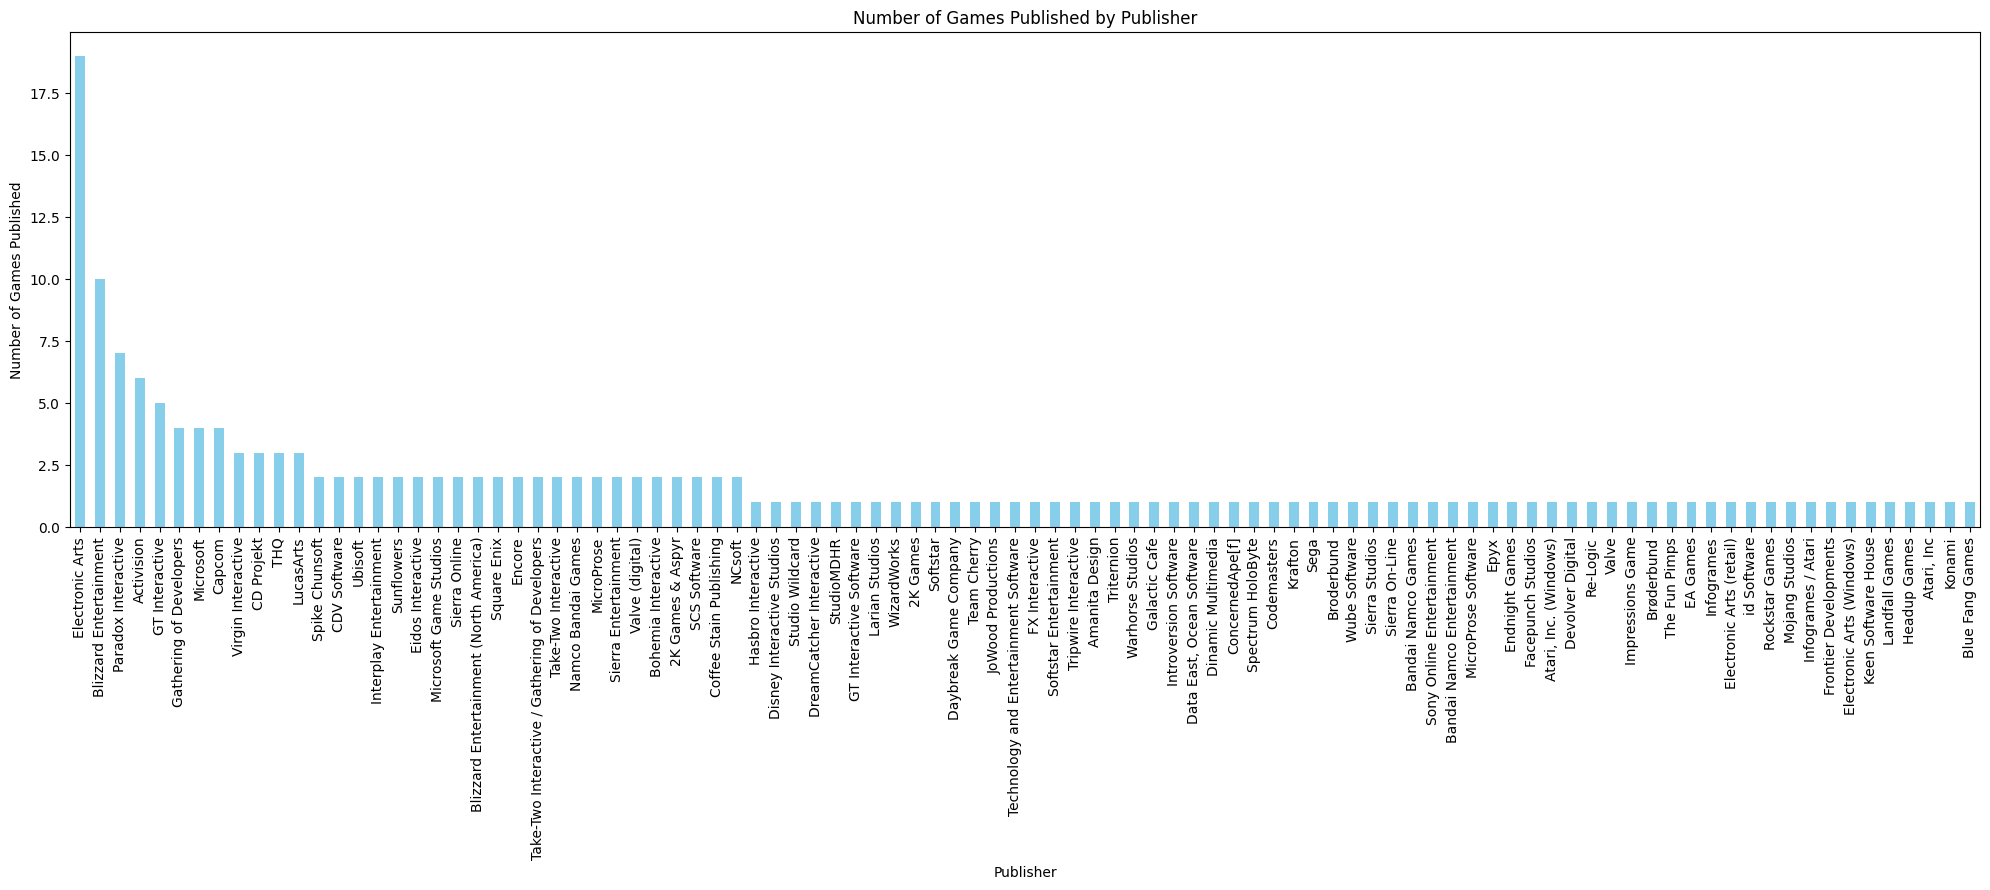

In [ ]:
# Menghitung jumlah game yang diterbitkan oleh setiap penerbit
publisher_counts = df['Publisher'].value_counts()

# Mengambil penerbit yang paling sering muncul (mode)
most_published = publisher_counts.idxmax()
most_published_count = publisher_counts.max()

print("Publisher that published most of the games:", most_published)
print("Number of games published by the most published publisher:", most_published_count)

# Membuat visualisasi dengan diagram batang
plt.figure(figsize=(20, 9))
bar_plot = publisher_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.title('Number of Games Published by Publisher')
plt.xticks(rotation=90)  # Memutar label sumbu x menjadi vertikal
plt.tight_layout()

# Menampilkan plot
plt.show()

# Which developer developed most of the games ?


In [ ]:
most_developed = df['Developer'].mode()[0]

print("Developer that developed most of the games:", most_developed)


Developer that developed most of the games: Blizzard Entertainment


Developer that developed most of the games: Blizzard Entertainment
Number of games developed by the most developed developer: 10


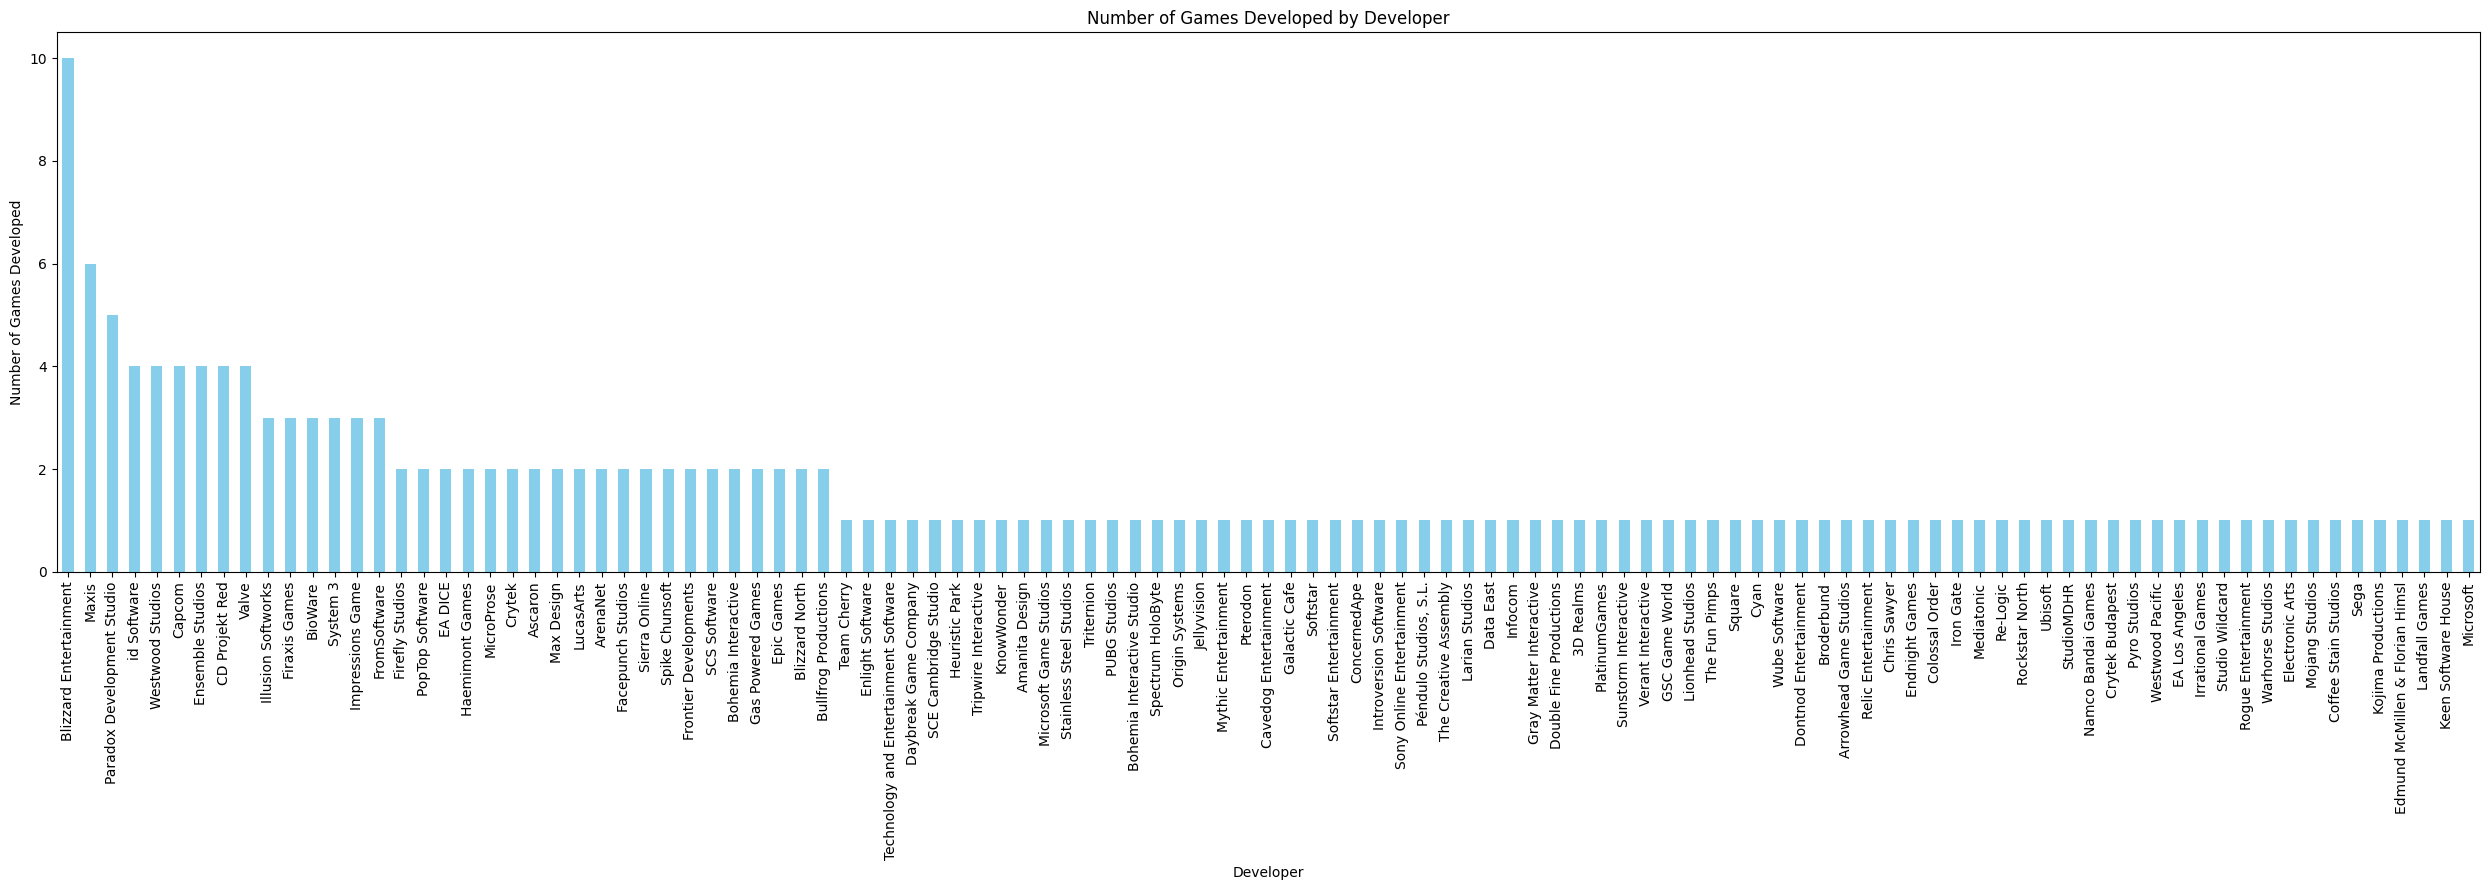

In [ ]:
# Menghitung jumlah game yang dikembangkan oleh setiap pengembang
developer_counts = df['Developer'].value_counts()

# Mengambil pengembang yang paling sering muncul (mode)
most_developed = developer_counts.idxmax()
most_developed_count = developer_counts.max()

print("Developer that developed most of the games:", most_developed)
print("Number of games developed by the most developed developer:", most_developed_count)

# Membuat visualisasi dengan diagram batang
plt.figure(figsize=(25, 9))
bar_plot = developer_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Developer')
plt.ylabel('Number of Games Developed')
plt.title('Number of Games Developed by Developer')
plt.xticks(rotation=90)  # Memutar label sumbu x menjadi vertikal
plt.tight_layout()

# Menampilkan plot
plt.show()

# Which series has the most sales ?

In [ ]:
series_most_sales = df.groupby('Series')['Sales'].sum().idxmax()

print("Series with the most sales:", series_most_sales)


Series with the most sales: Minecraft


Series with the most sales: Minecraft
Total sales for the series with the most sales: 33.0


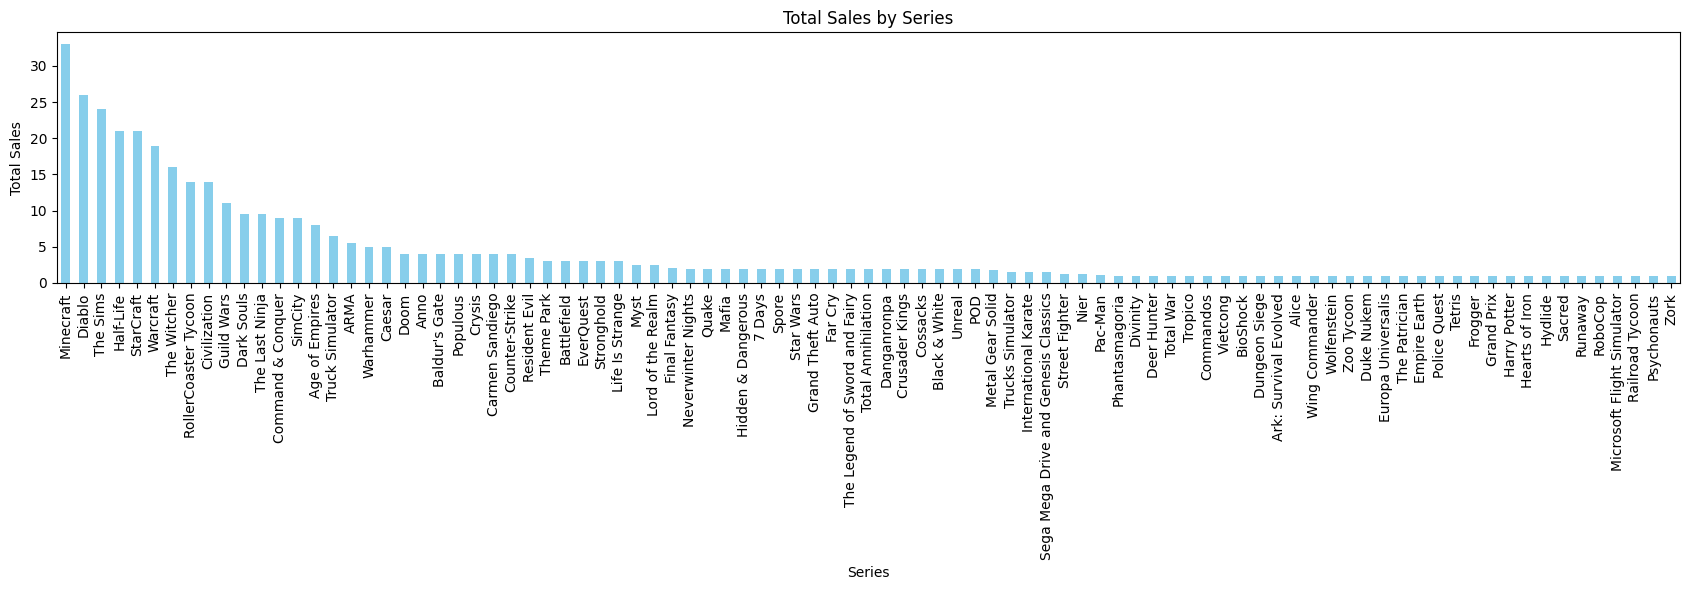

In [ ]:
# Menghitung total penjualan untuk setiap seri
series_sales = df.groupby('Series')['Sales'].sum()

# Mengambil seri dengan penjualan tertinggi
series_most_sales = series_sales.idxmax()
most_sales_value = series_sales.max()

print("Series with the most sales:", series_most_sales)
print("Total sales for the series with the most sales:", most_sales_value)

# Mengurutkan data penjualan seri
series_sales_sorted = series_sales.sort_values(ascending=False)

# Membuat visualisasi dengan diagram batang
plt.figure(figsize=(17, 6))
bar_plot = series_sales_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Series')
plt.ylabel('Total Sales')
plt.title('Total Sales by Series')
plt.xticks(rotation=90)
plt.tight_layout()


# Which series have the most games?


In [ ]:
series_most_games = df['Series'].mode()[0]

print("Series with the most games:", series_most_games)


Series with the most games: StarCraft


Series with the most games: StarCraft
Number of games for the series with the most games: 6


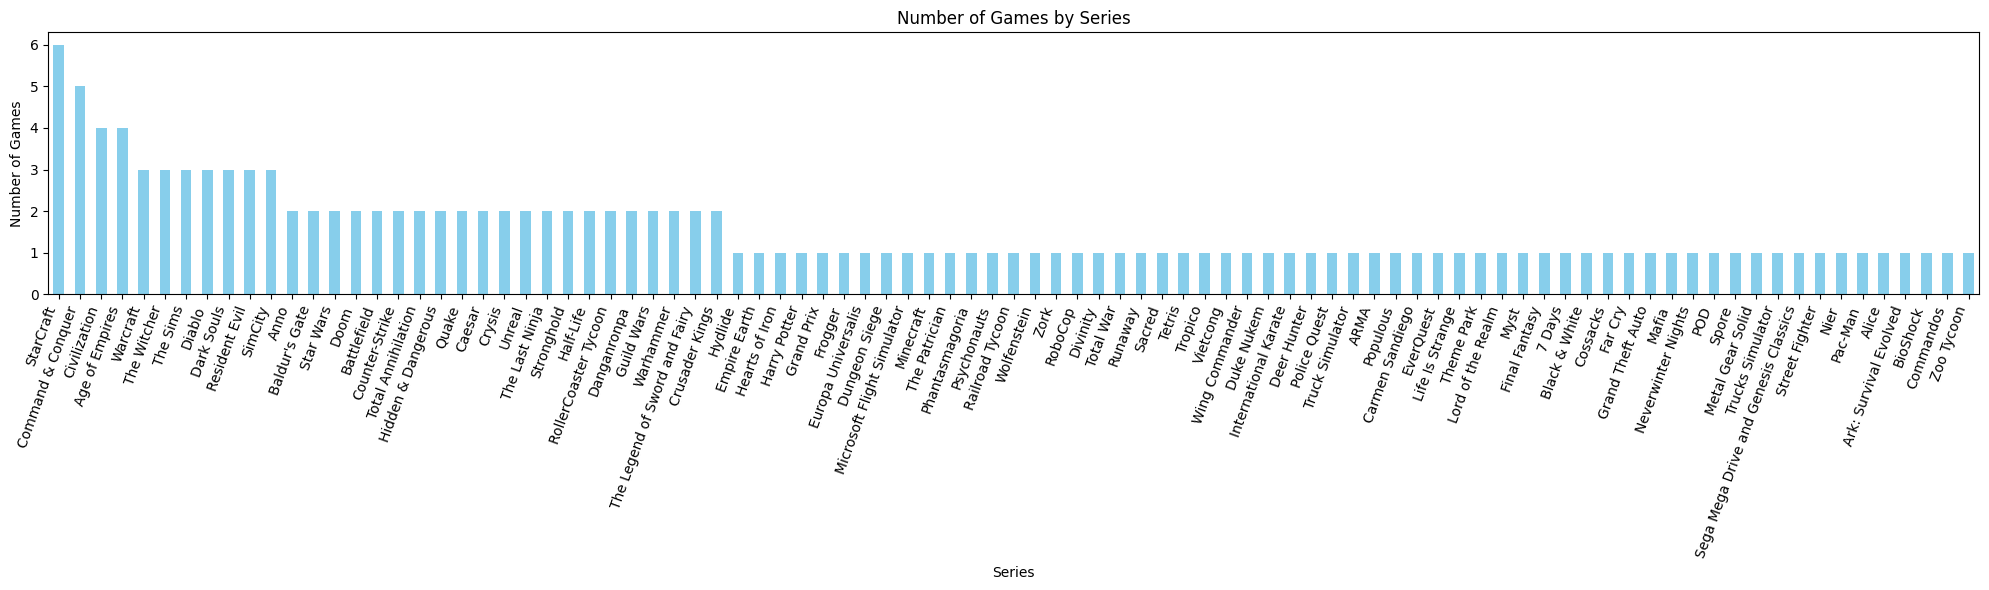

In [ ]:
# Menghitung jumlah game untuk setiap seri
series_game_count = df['Series'].value_counts()

# Mengambil seri dengan jumlah game terbanyak
series_most_games = series_game_count.idxmax()
most_games_count = series_game_count.max()

print("Series with the most games:", series_most_games)
print("Number of games for the series with the most games:", most_games_count)

# Membuat visualisasi dengan diagram batang
plt.figure(figsize=(20, 6))
bar_plot = series_game_count.plot(kind='bar', color='skyblue')
plt.xlabel('Series')
plt.ylabel('Number of Games')
plt.title('Number of Games by Series')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

# Menampilkan plot
plt.show()